In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 데이터 불러오기

In [ ]:
from google.colab import files
files.upload()

In [ ]:
nbastat = pd.read_csv('nbastat2022.csv')
nbastat

,#,PLAYER,GP,MIN,PTS,FGM,FGA,FG%,3PM,3PA,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,EF
0,1.0,Joel Embiid,56.0,33.4,29.9,9.4,19.3,48.9,1.4,3.7,...,11.9,82.1,2.1,9.3,11.4,4.4,1.0,1.4,3.0,33.2
1,2.0,Giannis Antetokounmpo,59.0,32.9,29.8,10.2,18.6,54.7,1.1,3.7,...,11.6,72.1,2.0,9.5,11.5,5.8,1.1,1.4,3.2,34.8
2,3.0,LeBron James,51.0,36.9,29.5,11.1,21.3,52.0,2.8,8.0,...,6.0,76.0,1.1,7.0,8.1,6.2,1.4,1.1,3.5,31.1
3,4.0,Luka Doncic,53.0,35.7,28.2,9.9,21.8,45.5,2.9,8.5,...,7.4,74.4,0.9,8.4,9.3,8.6,1.2,0.6,4.5,29.6
4,5.0,Trae Young,64.0,34.9,28.0,9.3,20.4,45.6,3.0,7.8,...,7.2,90.0,0.6,3.2,3.8,9.5,1.0,0.1,4.0,26.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,243.0,Isaiah Joe,48.0,11.6,3.6,1.1,3.3,35.0,0.8,2.5,...,0.5,92.3,0.1,0.9,1.0,0.7,0.3,0.1,0.3,3.1
245,244.0,Tony Snell,49.0,15.8,3.4,1.2,3.1,39.2,0.9,2.4,...,0.1,100.0,0.3,1.7,2.0,0.5,0.3,0.2,0.4,4.1
246,245.0,Dalano Banton,58.0,11.5,3.4,1.4,3.4,40.3,0.2,0.9,...,0.7,61.5,0.6,1.4,2.0,1.6,0.5,0.2,0.9,4.4
247,246.0,Trent Forrest,54.0,12.6,3.2,1.2,2.5,50.4,0.1,0.4,...,0.8,83.7,0.3,1.3,1.6,1.7,0.5,0.1,0.9,5.0


In [ ]:
m = len(nbastat)
m

249

In [ ]:
nbastat2 = nbastat[['FGA','3PA','FTA','PTS']]
nbastat2 = nbastat2.dropna(axis=0)
m = len(nbastat2)
x1 = nbastat2[['FGA']]
x2 = nbastat2[['3PA']]
x3 = nbastat2[['FTA']]
Y = nbastat2[['PTS']]
print(m)

248


In [ ]:
x1 = np.array(x1).reshape((m,1))
x2 = np.array(x2).reshape((m,1))
x3 = np.array(x3).reshape((m,1))
Y = np.array(Y).reshape((m,1))

In [ ]:
x0 = np.ones((m,1))
Xb = np.c_[x0,x1,x2,x3]

In [ ]:
n_iter = 200
learning_rate = 0.001
theta = np.zeros((4,1))
print(Xb.shape)
print(theta.shape)

(248, 4)
(4, 1)


In [ ]:
def compute_J(theta,Xb,Y):
  loss_vec = Xb.dot(theta)-Y
  loss_vec = loss_vec.reshape(-1)

  loss = np.square(loss_vec)
  loss = np.sum(loss)/(2*m)

  return loss




In [ ]:
loss_arr = []

for i in range(n_iter):
  gradients = (1.0/m)*Xb.T.dot(Xb.dot(theta)-Y)
  theta = theta - learning_rate * gradients

  loss = compute_J(theta,Xb,Y)
  loss_arr.append(loss)

print(loss_arr)

[67.98269119533617, 50.66980927072012, 37.84450609799018, 28.343212927224663, 21.30406129513392, 16.088655516746538, 12.224128694767522, 9.36022295741361, 7.237498310376648, 5.66378457778154, 4.4967390913883785, 3.6309269758318132, 2.988251371345212, 2.5108649926598368, 2.155919641370723, 1.8916771109988868, 1.6946284908553335, 1.5473604021798393, 1.4369744953725379, 1.353916753907025, 1.2911103466374834, 1.2433133217974925, 1.2066428437554564, 1.1782227898532218, 1.1559227214385088, 1.1381645367850561, 1.1237792567442473, 1.1119009442718686, 1.1018881294316705, 1.0932656080133425, 1.0856813311146694, 1.0788744727697, 1.0726517772807005, 1.0668700394193382, 1.0614231273127614, 1.0562323701472092, 1.0512394382296457, 1.0464010691668804, 1.0416851614845886, 1.037067881124388, 1.0325315181910375, 1.0280628994183212, 1.0236522122619955, 1.0192921338895302, 1.014977186010333, 1.0107032569885663, 1.0064672478640733, 1.0022668101534427, 0.9981001516336699, 0.993965892481306, 0.989862958710497

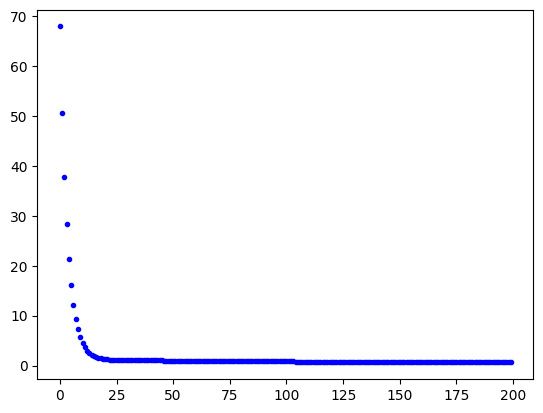

In [ ]:
plt.plot(loss_arr,'.b')

In [ ]:
y_hat = Xb.dot(theta)   # Y = theta0 + theta1 * X
error = (1/len(y_hat))*(y_hat-Y).T.dot(y_hat-Y)
error

array([[1.22441438]])